In [1]:
import os
import re
from unsloth import FastVisionModel
from models import qwen2vl_unsloth as qwuns
from models import phi4vl as phi
import docdataset as dd
import prompt_templates as pt
import docfocus as df

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.


/opt/conda/envs/python3.10-mt-vlm/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


🦥 Unsloth Zoo will now patch everything to make training faster!


In [2]:
cd /root/ucu-mt/src

/root/ucu-mt/src


/opt/conda/envs/python3.10-mt-vlm/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
dataset = dd.download_dataset()['train']

In [4]:
model = qwuns.QwenVL2_LLM(
    model_name = "unsloth/Qwen2.5-VL-7B-Instruct",
    max_new_tokens = 4096,
    device = "cuda",
    load_in_4bit = False,
    use_gradient_checkpointing = "unsloth"
)

==((====))==  Unsloth 2025.3.19: Fast Qwen2_5_Vl patching. Transformers: 4.50.3.
   \\   /|    NVIDIA GeForce RTX 3090. Num GPUs = 1. Max memory: 23.684 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.6. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!
Unsloth: QLoRA and full finetuning all not selected. Switching to 16bit LoRA.


Loading checkpoint shards: 100%|██████████| 5/5 [00:02<00:00,  2.37it/s]
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [6]:
model = phi.Phi4VisionLLM(
    model_name = "microsoft/Phi-4-multimodal-instruct",
    max_new_tokens = 1000,
    device = "cuda",
    attn_mech = "flash_attention_2"
)

Loading checkpoint shards: 100%|██████████| 3/3 [00:10<00:00,  3.60s/it]


In [7]:
image = dataset[-10]["image"]

model.set_prompt(pt.get_text_template())

result = model.process_doc_image(image)

if result:
    print("result:", result)
else:
    print("Failed to parse the response.")

result: КЕЙНСІАНСЬКА ФУКЦІЯ ІНВЕСТИЦІЙ
Огляд ключісної функції інвестицій
Кейсіанська функція інвестицій, розроблена Доном Мейнарлом Кейсом, є популярною методологією для оцінки інвестиційного клімату. Вона базується на концепції такого інвестиційного клімату, як розробленого Доном Мейнарлом Кейсом.
Ключові деталі функції та її забезпечення
Глобальні елементи ключісної функції інвестицій — це граціна ефективності капіталу, яка визначає витратність інвестицій, і порівняння отриманих прибутків з інвестиційним портфоліо. Відносно інвестиційних проектів, що забезпечують портфоліо та потенційно демонструють обертові прибутки протягом стійкого часу, це важливі для розуміння інвестиційних стійкостей.
Практичні приклади забезпечення функції
Реалізація ключісної функції інвестицій вимагає аналізу потенційних стійкостей економічної дійсності проекту. При зменшенні потенційної стійкості інвестиційного портфоліо зростає, тому використання більшого проекту при високій ефективності капіталу.
Таблиця

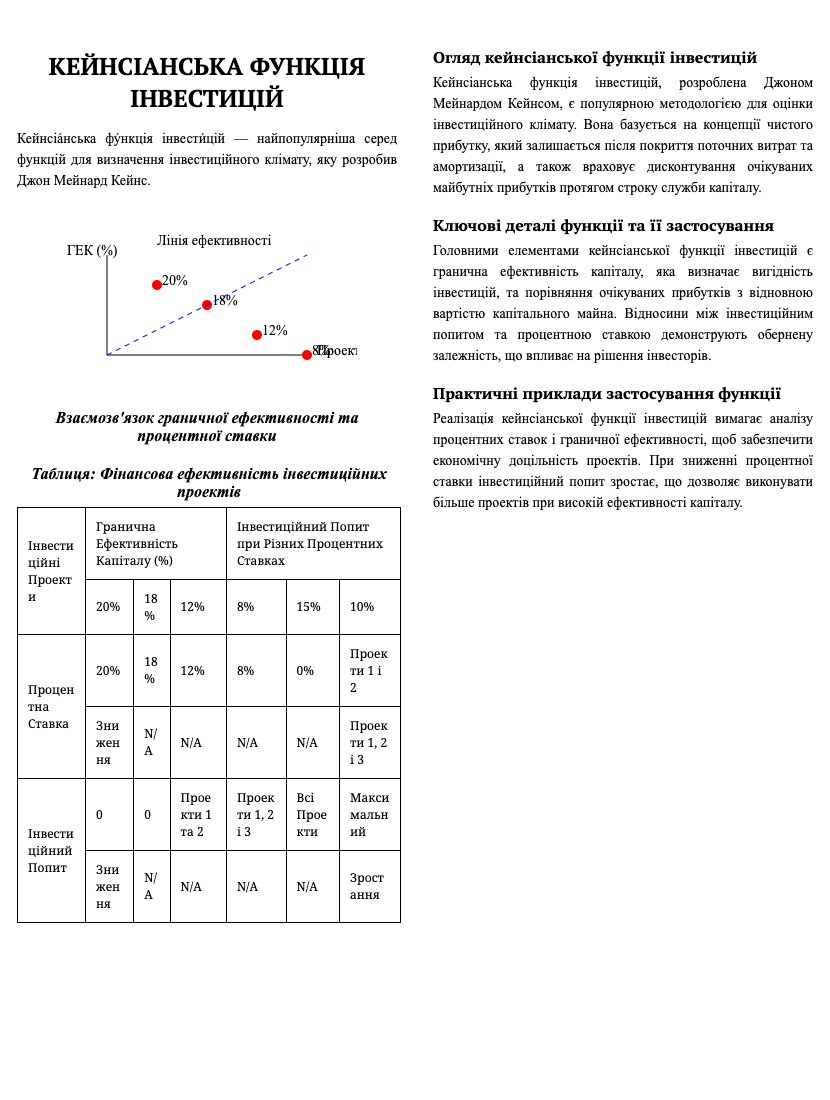

In [9]:
image

In [ ]:
# OCR Text sections
dataset = dataset.shuffle(seed=42)

model.set_prompt(pt.get_text_template())
df.ocr_dataset(dataset, "../results/ocr_text_phi4vl.jsonl", ocr_fn= model.process_doc_image, chunk_size=2, lang="ukr", region_types=["text"])

In [ ]:
# OCR Doc sections
dataset = dataset.shuffle(seed=42)

model.set_prompt(pt.get_text_template())
df.ocr_dataset(dataset, "../results/ocr_whole_doc_phi4vl.jsonl", ocr_fn= model.process_doc_image, chunk_size=2, lang="ukr")

In [ ]:
# Table Extraction Table sections
dataset = dataset.shuffle(seed=42)

model.set_prompt(pt.get_table_template())
df.ocr_dataset(dataset, "../results/table_table_phi4vl.jsonl", ocr_fn= model.process_doc_image, chunk_size=2, lang="ukr", region_types=["table"])

In [ ]:
# Table Extraction Doc sections
dataset = dataset.shuffle(seed=42)

model.set_prompt(pt.get_table_template())
df.ocr_dataset(dataset, "../results/table_whole_doc_phi4vl.jsonl", ocr_fn= model.process_doc_image, chunk_size=2, lang="ukr")

In [ ]:
# Layout Analysis Doc sections
dataset = dataset.shuffle(seed=42)

model.set_prompt(pt.get_title_template())
df.ocr_dataset(dataset, "../results/layout_whole_doc_phi4vl.jsonl", ocr_fn= model.process_doc_image, chunk_size=2, lang="ukr")

In [13]:
# Classification Doc sections
dataset = dataset.shuffle(seed=42)

model.set_prompt(pt.get_class_template())
df.ocr_dataset(dataset, "../results/class_whole_doc_phi4vl.jsonl", ocr_fn= model.process_doc_image, chunk_size=2, lang="ukr")

OCR Processing chunk 1 to 2
Saved 2 records to ../results/class_whole_doc_phi4vl.jsonl
OCR Processing chunk 3 to 4
Saved 0 records to ../results/class_whole_doc_phi4vl.jsonl
OCR Processing chunk 5 to 6
Saved 1 records to ../results/class_whole_doc_phi4vl.jsonl
OCR Processing chunk 7 to 8
Saved 2 records to ../results/class_whole_doc_phi4vl.jsonl
OCR Processing chunk 9 to 10
Saved 1 records to ../results/class_whole_doc_phi4vl.jsonl
OCR Processing chunk 11 to 12
Saved 2 records to ../results/class_whole_doc_phi4vl.jsonl
OCR Processing chunk 13 to 14
Saved 1 records to ../results/class_whole_doc_phi4vl.jsonl
OCR Processing chunk 15 to 16
Saved 1 records to ../results/class_whole_doc_phi4vl.jsonl
OCR Processing chunk 17 to 18
Saved 2 records to ../results/class_whole_doc_phi4vl.jsonl
OCR Processing chunk 19 to 20
Saved 2 records to ../results/class_whole_doc_phi4vl.jsonl
OCR Processing chunk 21 to 22
Saved 1 records to ../results/class_whole_doc_phi4vl.jsonl
OCR Processing chunk 23 to 24


## Release Memory

In [6]:
import torch
del model 
torch.cuda.empty_cache()

In [12]:
import torch
import gc
gc.collect()
torch.cuda.empty_cache()

In [13]:
for var in dir():
    if isinstance(eval(var), torch.Tensor):
        del globals()[var]
torch.cuda.empty_cache()

In [9]:
!nvidia-smi

Thu Mar 27 19:34:16 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.107.02             Driver Version: 550.107.02     CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3090        On  |   00000000:09:00.0 Off |                  N/A |
| 30%   47C    P5             59W /  350W |     300MiB /  24576MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [21]:
print(f"Memory allocated: {torch.cuda.memory_allocated() / 1024 / 1024:.2f} MB")
print(f"Memory reserved: {torch.cuda.memory_reserved() / 1024 / 1024:.2f} MB")

Memory allocated: 10.12 MB
Memory reserved: 40.00 MB
